**Цель лабораторной работы:** изучение ансамблей моделей машинного обучения

**Задание**
    
    1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
    2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
    3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
    4. Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [2]:
# Таблица данных
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Размер набора данных
data.shape

(1000, 8)

In [4]:
# Типы данных в колонках
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

## Подготовка к анализу данных

### Проверка на пропущенные значения

In [5]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Пропущенных значений нет

### Основные статистические показатели для каждого параметра

In [6]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Преообразование категориальных признаков в числовые

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
    # "gender" - пол
le.fit(data.gender.drop_duplicates()) 
data.gender = le.transform(data.gender)
    # "race/ethnicity" - раса
le.fit(data["race/ethnicity"].drop_duplicates()) 
data["race/ethnicity"] = le.transform(data["race/ethnicity"])
    # "lunch" - обед
le.fit(data.lunch.drop_duplicates()) 
data.lunch = le.transform(data.lunch)
    # "parental level of education" - образование родителей
le.fit(data["parental level of education"].drop_duplicates()) 
data["parental level of education"] = le.transform(data["parental level of education"])
    # "test preparation course" - подготовительный курс
le.fit(data["test preparation course"].drop_duplicates()) 
data["test preparation course"] = le.transform(data["test preparation course"])

In [9]:
data. head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [10]:
data.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.482000,2.174000,2.486000,0.645000,0.642000,66.08900,69.169000,68.054000
std,0.499926,1.157179,1.829522,0.478753,0.479652,15.16308,14.600192,15.195657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000
50%,0.000000,2.000000,2.000000,1.000000,1.000000,66.00000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.00000,79.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.00000,100.000000,100.000000


<AxesSubplot:>

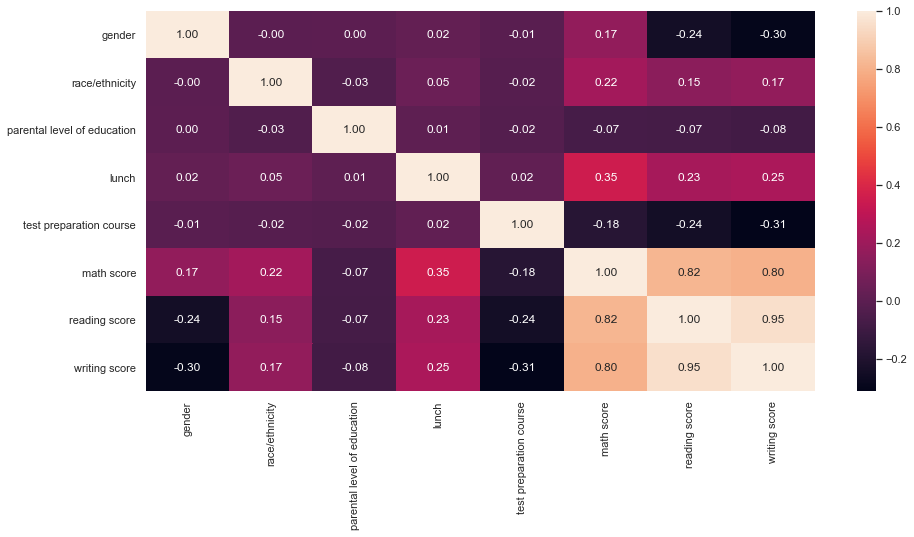

In [11]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

## 1. Тестовая и обучающая выборки

Подключим необходимый метод train_test_split из библиотек sklearn для разделения выборки на тестовую и обучающую

In [12]:
from sklearn.model_selection import train_test_split

### 1.1. Разделение выборки на входные и выходные данные

Задача регрессии будет состоять в предсказании баллов за письмо на основании других параметров, в связи с этим следующее распределение входных и выходных параметров:

In [13]:
X = data[["math score", "reading score"]]
Y = data["writing score"]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    math score  reading score
0          72             72
1          69             90
2          90             95
3          47             57
4          76             78 

Выходные данные:

 0    74
1    88
2    93
3    44
4    75
Name: writing score, dtype: int64


### 1.2. Разделим выборку на обучающую и тестовую

Размер тестовой выборки определим: 10%

In [14]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      math score  reading score
785          32             51
873          90             90
65           67             64
902          34             48
317          83             72 

Входные параметры тестовой выборки:

      math score  reading score
993          62             72
859          87             73
298          40             46
553          77             62
672          69             78 

Выходные параметры обучающей выборки:

 785    44
873    82
65     61
902    41
317    78
Name: writing score, dtype: int64 

Выходные параметры тестовой выборки:

 993    74
859    72
298    50
553    64
672    76
Name: writing score, dtype: int64


Проверим:

In [15]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(900, 2)
(100, 2)
(900,)
(100,)


## 1. Случайный лес

### 1.1. Построение случайного леса

Построим случайный лес из 5 деревьев

Подключим необходимый класс RandomForestRegressor из библиотек sklearn для построения случайного леса

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [18]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 1.6578007936507937
Средняя квадратичная ошибка: 5.315371416540692
Median absolute error: 1.2000000000000028
Коэффициент детерминации: 0.9725144002764362


**Построим график по полученным значениям**

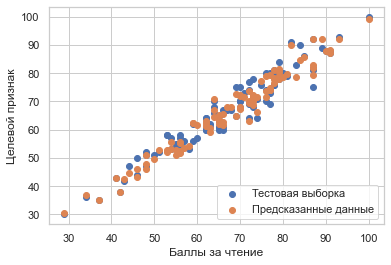

In [19]:
plt.scatter(X_test["reading score"], Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test["reading score"], Y_predict, marker = 'o', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Баллы за чтение')
plt.ylabel('Целевой признак')
plt.show()

### 1.2. Нахождение лучшего случайного леса

In [20]:
params2 = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 100],
    'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0]
}

In [21]:
grid_2 = GridSearchCV(estimator=RandomForestRegressor(oob_score=True, random_state=10),
                      param_grid=params2, 
                      scoring='neg_mean_squared_error', 
                      cv=3, 
                      n_jobs=-1)
grid_2.fit(X, Y)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(oob_score=True, random_state=10),
             n_jobs=-1,
             param_grid={'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                          25, 50, 75, 100]},
             scoring='neg_mean_squared_error')

In [22]:
print('Лучший показатель средней квадратичной ошибки:', -grid_2.best_score_)
print('Параметры для данного показателя:\n',            grid_2.best_params_)

Лучший показатель средней квадратичной ошибки: 25.670031062773088
Параметры для данного показателя:
 {'max_features': 0.2, 'n_estimators': 100}


In [23]:
forest_3 = RandomForestRegressor(n_estimators=100, max_features = 0.2, oob_score=True, random_state=10)
forest_3.fit(X, Y)

RandomForestRegressor(max_features=0.2, oob_score=True, random_state=10)

In [24]:
Y_predict3 = forest_3.predict(X_test)

In [25]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict3))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict3))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict3))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict3))

Средняя абсолютная ошибка: 1.556961386946387
Средняя квадратичная ошибка: 4.268657442608737
Median absolute error: 1.1524523809523792
Коэффициент детерминации: 0.9779269216334626


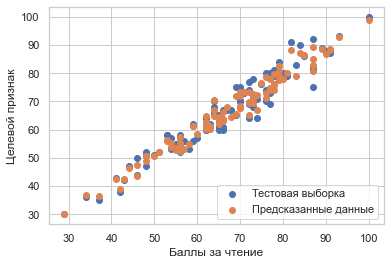

In [26]:
plt.scatter(X_test["reading score"], Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test["reading score"], Y_predict3, marker = 'o', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Баллы за чтение')
plt.ylabel('Целевой признак')
plt.show()

    Показатели точности стали лучше по коэффициенту детерминации.
    На графике видно хорошее совпадение тестовой выборки и предсказанных данных, хотя при баллах от 70 до 80 заметно расхождение в данных.

## 2. Градиентный бустинг

Построим ансамбль из 5 моделей

Подключим необходимый класс GradientBoostingRegressor из библиотек sklearn для построения ансамбля

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
grad = GradientBoostingRegressor(n_estimators=5, random_state = 10)
grad.fit(X_train, Y_train)

GradientBoostingRegressor(n_estimators=5, random_state=10)

In [29]:
Y_grad_pred = grad.predict(X_test)

In [30]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_grad_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_grad_pred))
print('Median absolute error:',       median_absolute_error(Y_test, Y_grad_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_grad_pred))

Средняя абсолютная ошибка: 6.915921990732791
Средняя квадратичная ошибка: 74.34018535402228
Median absolute error: 6.007477852462813
Коэффициент детерминации: 0.6155895011103495


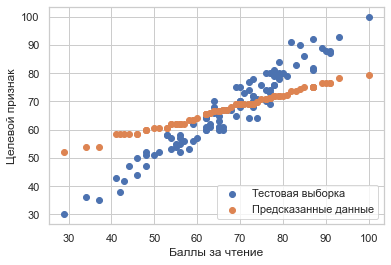

In [31]:
plt.scatter(X_test["reading score"], Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test["reading score"], Y_grad_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Баллы за чтение')
plt.ylabel('Целевой признак')
plt.show()

Без подбора гиперпараметров ансамбль работает очень плохо

Для улучшения применим кросс-валидацию.

In [32]:
params = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 100],
    'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0],
    'min_samples_leaf': [0.01, 0.04, 0.06, 0.08, 0.1]
}

In [33]:
grid_gr = GridSearchCV(estimator=GradientBoostingRegressor(random_state=10),
                       param_grid=params,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       n_jobs=-1)
grid_gr.fit(X, Y)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=10),
             n_jobs=-1,
             param_grid={'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0],
                         'min_samples_leaf': [0.01, 0.04, 0.06, 0.08, 0.1],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                          25, 50, 75, 100]},
             scoring='neg_mean_squared_error')

In [34]:
print('Лучший показатель средней квадратичной ошибки:', -grid_gr.best_score_)
print('Параметры для данного показателя:\n',            grid_gr.best_params_)

Лучший показатель средней квадратичной ошибки: 22.561299771305215
Параметры для данного показателя:
 {'max_features': 1.0, 'min_samples_leaf': 0.01, 'n_estimators': 50}


In [35]:
grad1 = GradientBoostingRegressor(n_estimators=50, max_features = 1.0, min_samples_leaf = 0.01, random_state = 10)
grad1.fit(X_train, Y_train)
Y_grad_pred1 = grad1.predict(X_test)

Оценим полученный ансамбль

In [36]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_grad_pred1))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_grad_pred1))
print('Median absolute error:',       median_absolute_error(Y_test, Y_grad_pred1))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_grad_pred1))

Средняя абсолютная ошибка: 3.0505379827033634
Средняя квадратичная ошибка: 14.868317908004379
Median absolute error: 2.3473510215526794
Коэффициент детерминации: 0.9231164480227296


Построим график для визуального сравнения

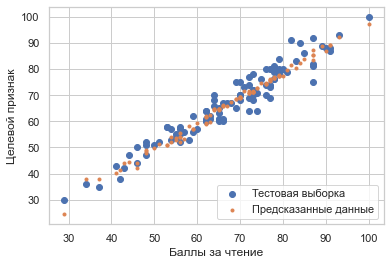

In [37]:
plt.scatter (X_test["reading score"], Y_test,       marker = 'o', label = 'Тестовая выборка')
plt.scatter (X_test["reading score"], Y_grad_pred1, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Баллы за чтение')
plt.ylabel ('Целевой признак')
plt.show()